#  Анализ Данных 

 Проект направлен на анализ данных из открытых источников, охватывающих продажи компьютерных игр с оценками пользователей
и экспертов, а также указанием жанров и платформ. Основной целью проекта является выявление закономерностей и факторов,
влияющих на популярность игр у геймеров. Полученные результаты будут учтены при проведении рекламных компаний и выборе
стратегии продаж в интернет-магазине 'Стримчик'.

### Загрузка  и предварительный просмотр данных.

In [140]:
# импортируем необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# pd.set_option('display.max_columns', None)

Считаем данные из csv-файлов: '/datasets/games.csv' и выведем часть таблицы для ознокомления.



In [141]:
# df_games = pd.read_csv( '/datasets/games.csv')
df_games = pd.read_csv( 'games.csv')
df_games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Изучим общую информацию о датафрейме df_games:

In [102]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исходный датафрейм содержит 16715 записей, что достаточно для анализа в рамках проекта.  
Для дальнейшей работы с датафреймом
необходимо провости предобработку данных: 
1. Проанализировать характер пропусков, причины их появлений и по возможности заполнить подобранными значениями.
2. Удалить строки, которые в силу имеющихся пропусков неинформативны.
3. Преобразовать типы данных.
4. При наличии обработать  явные и неявные дубликаты.


### Предобработка данных

Заменим прописные буквы в названиях столбцов на строчные и проверим результат.

In [103]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [104]:
df_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [105]:
# переведем в нижний регистр символы в названиях столбцов датафрейма df_games
df_games.columns = df_games.columns.str.lower()
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Результат: в назвниях столбцов используются только строчные буквы.

#### Обработка пропусков в столбце`name`

В таблице имеются две строки с пропусками в столбце `name`, напечатаем их.

In [106]:
df_games.query('name.isna()')
 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN



В этих строках содержится информация об играх, выпущенных  в 1993г. В рамках данного проекта информация не
 имеет существенного значения, к тому же имеются пропуски и в других столбцах. Удалим эти строки из датафрема.

In [107]:
df_games = df_games.dropna(subset=['name']).reset_index(drop=True)


In [108]:
df_games['name'].isna().sum()

0

#### Обработка пропусков  и преобразование типа данных  в столбце`year_of_release`

Посчитаем пропуски в столбце `year_of_release`.

In [109]:
print (f'Количество пропусков в столбце "year_of_release": {df_games["year_of_release"].isna().sum()}')

Количество пропусков в столбце "year_of_release": 269


Проанализируем, как распределены строки с отсутствующими данными по различным платформам  и по играм:

In [110]:
df_games.query('year_of_release.isna()')['platform'].value_counts()

PS2     34
Wii     34
X360    30
DS      30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
PSV      1
GB       1
Name: platform, dtype: int64

In [111]:
df_games.query('year_of_release.isna()')[['name']].value_counts().head(30)

name                                                          
LEGO Harry Potter: Years 5-7                                      7
Rock Band                                                         4
Happy Feet Two                                                    4
WRC: FIA World Rally Championship                                 3
Test Drive Unlimited 2                                            3
Bejeweled 3                                                       3
Virtua Quest                                                      2
Captain America: Super Soldier                                    2
Port Royale 3                                                     2
LEGO Batman: The Videogame                                        2
Robert Ludlum's The Bourne Conspiracy                             2
Combat Elite: WWII Paratroopers                                   2
PDC World Championship Darts 2008                                 2
The Lord of the Rings: War in the North              

Учитывая небольшое количество строк с пропусками, а также разнообразие игр и платформ в них,  разумным решением станет удаление таких строк.

In [112]:
df_games.dropna(subset=['year_of_release'],inplace=True)
df_games.reset_index(drop=True, inplace=True)

In [113]:
df_games['year_of_release'].isna().sum()

0

Приведем тип данных в столбце `year_of_release` к целочисленному значению и проверим результат.

In [114]:
df_games['year_of_release'] =df_games['year_of_release'].astype('int')
df_games['year_of_release'].dtypes

dtype('int32')

#### Обработка пропусков  и преобразование типа данныхв столбцах  `critic_score `,`user_score  `.

In [115]:
df_games[['critic_score','user_score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   critic_score  7983 non-null   float64
 1   user_score    9839 non-null   object 
dtypes: float64(1), object(1)
memory usage: 257.1+ KB


Столбец `user_score` содержит средние оценки пользователей игр, которые должны быть представлены вещественными числами в диапазоне от 0 до 10. Однако видно, что тип данных этого столбца - 'object', а не числовой. Для анализа
причин этого выведем уникальные значения столбца `user_score`:

In [116]:
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `user_score` есть строковое значение 'tbd', вероятное значение которого 'to be decided' или будет решено. Это скорее всего указывает на отсутствие рейтинга в данный момент, предлагаем заменить  все вхождения 'tbd' на nan.
Воспользуемся методом .to_numeric, который позволяеят одномоментно изменить тип данных и обрабатать нечисловые значения,
заменив их пропусками. После проверим результат. 

In [117]:
# изменим тип данных столбца 'user_score'  с одновременной заменой строковых значений на пропуски
df_games['user_score']= pd.to_numeric(df_games['user_score'],errors='coerce')
# выведем тип данных и уникальные значения 'user_score'
print(f'Тип данных:{df_games["user_score"].dtypes} \n \n {sorted(df_games["user_score"].unique())}')

Тип данных:float64 
 
 [8.0, nan, 0.0, 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7]


Тип данных в столбце `user_score` изменился на float64.

Столбец `critic_score` оставим без изменений.

#### Обработка пропусков  и преобразование типа данных в столбце ` rating`

Ознакомимся с типом данных столбца  ` rating` и посчитаем в нем пропуски.

In [118]:
print(f'Тип данных:{df_games["rating"].dtypes}\n \nКоличество пропусков:{df_games["rating"].isna().sum()}')

Тип данных:object
 
Количество пропусков:6676


Выведем уникальные значения в столбце  ` rating` .

In [119]:
df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Составим таблицу,содержащую расшифровку значений рейтингов ESRB.

In [120]:
rating_esrb = {'rating':['E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],'value':
    ['Everyone','Mature','Teen',' Everyone 10 and older','Kids to Adults','Adults Only','Early Childhood',' Rating Pending']}
rating_esrb = pd.DataFrame(rating_esrb)
rating_esrb

,rating,value
0,E,Everyone
1,M,Mature
2,T,Teen
3,E10+,Everyone 10 and older
4,K-A,Kids to Adults
5,AO,Adults Only
6,EC,Early Childhood
7,RP,Rating Pending


Обратим внимение на две позиции:
1. RP - игра ожидает присвоение рейтинга. Это означает, что для таких игр рейтинг пока не установлен. Можем заменить пропуски 
   этим значением.
   
2. К-A - От детей до взрослых. Этот рейтинг был использован до введения рейтинга 'E' и указывал на то, что игры подходят для        всех возрастов. Игры с этим рейтингом подходят для всех возрастов, можем заменить его значением 'Е', тем самым сократив    количество категорий.

Заполним пропуски и проверим результат

In [121]:
# заполним пропуски в df_games['rating'] значением 'PR', значение возьмем из таблицы rating_esrb.
df_games['rating'].fillna(rating_esrb.loc[7,'rating'], inplace = True)

print(f'Количество пропусков:{df_games["rating"].isna().sum()}')

Количество пропусков:0


заменим 'K-A' на 'E' и проверим результат.

In [122]:
# заменим значени K-A на E ,  K-A  возьмем из таблицы rating_esrb
df_games['rating'].where(df_games['rating'] != rating_esrb.loc[4,'rating'], 'E', inplace = True)
print(f'Список уникальных значений "rating":{df_games["rating"].unique()}')

Список уникальных значений "rating":['E' 'RP' 'M' 'T' 'E10+' 'AO' 'EC']


После произведенных изменений выведем общую информацию о датасете:

In [123]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


#### Проверка датафреййма на наличие дубликатов.

Проверим датафрейм   `df_games` наналичие явных дубликатов.

In [124]:
print(f'Выявлено явных дубликатов:{df_games.duplicated().sum()}')

Выявлено явных дубликатов:0


In [125]:
# сравним количество уникальных значений'name' c количеством уникальных значений 'name', переведенных в нижний регистр
if len(df_games['name'].unique()) == len(df_games['name'].str.lower().unique()):
    print(' в столбце "name" неявных дубликатов не обнаружено')
else:   
    print('есть признаки неявных дубликатов в столбце"name"')

 в столбце "name" неявных дубликатов не обнаружено


Проверим наличие неявных дубликатов в столбцах:`platform`,`genre`,`raiting`

In [126]:
df_games['platform'].unique()


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [127]:
df_games['genre'].unique()


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [128]:
df_games['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

Возможно наличие явных дубликатов в тройке столбцов  `'year_of_release','name','platform' `,  проверим это.

In [129]:
df_games[df_games[['year_of_release','name','platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Обнаружен явный дубликат, удалим его и проверим результат.

In [130]:
df_games.drop_duplicates(subset=['year_of_release', 'name', 'platform'], inplace=True)
df_games.reset_index(drop=True, inplace=True)
print(f'Количество явных дубликатов в тройке: ["year_of_release","name","platform"]:\
      {df_games[["year_of_release","name","platform"]].duplicated().sum()}')

Количество явных дубликатов в тройке: ["year_of_release","name","platform"]:      0


Визуально убедились в отсутствии неявных дубликатов в этих столбцах.

Добавим в df_games столбец `sum_sales` c сумарными продажами во всех регионах.



In [131]:
df_games['sum_sales'] = df_games.apply(lambda x :x['na_sales']+x['eu_sales']+x['jp_sales']+ x['other_sales'], axis=1)

In [132]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


In [133]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  sum_sales        16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.4+ MB


В результате  предобработки данных получили **итоговый датфрейм 'df_games'**.
Для этого в исходной таблице произвели следующие изменения:
1. Заполнили пропуски в столбцах`raiting`,` year_of_release `.
2. Обработали пропуски в  столбце `name`.
3. Оптимизировали котегоризацию столбца`rating`.
4. Привели типы данных: к целочисленному в  столбце `year_of_release`, к числовому в столбце `user_score`
5. Проверили данные на наличие дубликатов
6. Создали столбец `sum_sales` с сумарными продажами во всех регионах.

### Исследовательский анализ данных

#### Анализ актуальных игровых платформ и определение оптимального временного интервала для исследования
    

Составим таблицу с данными о количестве  игр в разные годы и визуализируем ее. Воспользуемся данными таблицы `df_games`.

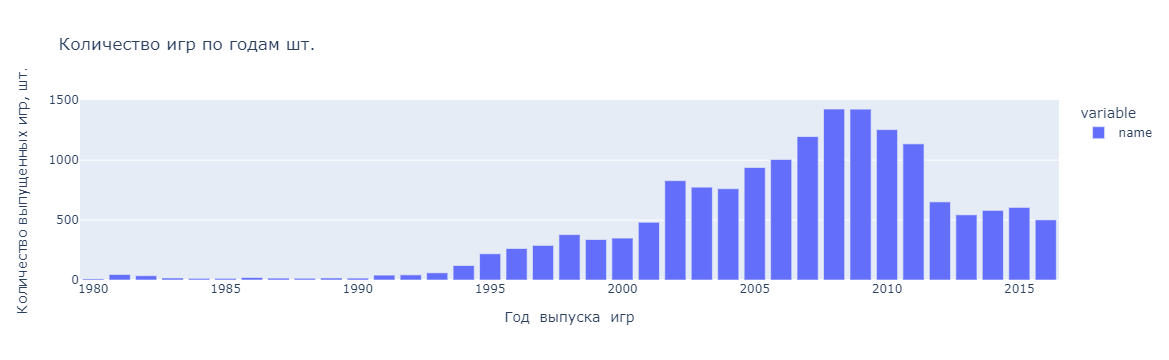

In [134]:
# сгруппируем df_games по столбцу 'year_of_release' и посчитаем количество значений в столбце 'name', результат сохраним в
# пременной years_agg_games
years_agg_games = df_games.groupby(by='year_of_release')[['name']].count()
# построим столбчатый график
px.bar(years_agg_games, labels={'value':'Количество выпущенных игр, шт.',
                             'year_of_release':'Год  выпуска  игр'},
                              title='Количество игр по годам шт.')

Пик выпуска игр пришелся на 2008-2009годы, после чего наблюдался спад, который завершился  в 2013году.
На графике виден небольшой спад продаж в 2016 после относительного роста, наблюдавшегося в течении 3 лет ранее. Можно предположить, что данные за 2016г. неполные. В дальнейшем будем учитывать этот факт. 

Проанализируем продажи по платформам.

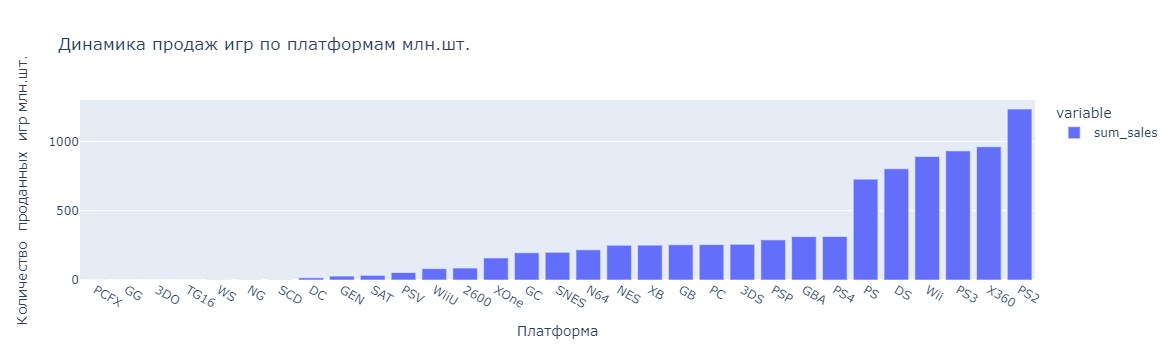

In [135]:
# # сгруппируем df_games по столбцу 'platform' и посчитаем cevve значений в столбце 'sum_sales', результат сохраним в
# пременной platform_sales_sum
platform_sales_sum = df_games.groupby(by='platform')[['sum_sales']].sum()
platform_sales_sum.sort_values(by='sum_sales',inplace=True)

px.bar(platform_sales_sum,labels={'value':'Количество  проданных  игр млн.шт.',
                             'platform':'Платформа'},
                              title='Динамика продаж игр по платформам млн.шт.')

Исследуем распределение проданных игр  по платформам. На графике выделяются несколько групп:
1. C количеством продаж более 700млн.шт.(PS, DS, Wii, PS3, X360, PS2)
2. C количеством продаж менее 15млн.шт.
3. С количеством продаж в интервале от 150 до320 млн. шт.
4. С количеством продаж в интервале от 15 до 100 млн. шт


Проанализируем продажи платформ по годам. 
Мы начнем с выбора платформ, на которых продажи были наименьшими, и убедимся, что они неактуальны на последний изучаемый год (2016 год). Затем мы подберем уровень количества продаж, чтобы выявить платформы с высокими продажами за рассматриваемый период. 

Также проанализируем на массиве данных  время актуальности  игровых платформ.

Для этого создадим функцию принимающую  в качестве аргумента количество продаж и возвращающую список платформ и
таблицу с распределенияем количества продаж по платформам и годам. Также предусмотрен именованный параметр для напрвления
отсева: 
1. True -отбрасываем платформы менее заданного количества продаж( по умолчанию)
2. False- отбрасываем платформы более заданного количества прадаж.


In [136]:
# sumsales -количество прадаж, сompare направление отсева (True -отбрасываем левый 'хвост')
def platform_sales_table(sumsales, compare = True):
        if compare:
# формируем список платформ прадажи в которых  более  sumsales.           
            platform_list = platform_sales_sum.query('sum_sales > @sumsales').index.to_list()
        else:
# формируем список платформ прадажи в которых  более  sumsales.           
             platform_list = platform_sales_sum.query('sum_sales < @sumsales').index.to_list() 
#  создаем сводную таблицу, сгрупировав df_games по годам и  по  сформировнному выше списку,  столбцов , 
# агрегируем суммарное значение продаж функцией sum.
        platform_sales_sum_years = df_games.query('platform.isin(@platform_list)').\
pivot_table(index='year_of_release',columns='platform', values='sum_sales', aggfunc='sum').fillna(0)
#  возвращаем список и датафрейм   
        return  platform_list ,  platform_sales_sum_years

Проанализируем платформы с продажами менее 50 млн. шт.

In [137]:
sumsales=50
platform_list,  platform_sales_sum_years = platform_sales_table(sumsales,compare=False)
print(platform_list)
platform_sales_sum_years

['PCFX', 'GG', '3DO', 'TG16', 'WS', 'NG', 'SCD', 'DC', 'GEN', 'SAT']


platform,3DO,DC,GEN,GG,NG,PCFX,SAT,SCD,TG16,WS
year_of_release,,,,,,,,,,
1990,0.00,0.00,2.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1991,0.00,0.00,4.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1992,0.00,0.00,12.64,0.04,0.00,0.00,0.00,0.00,0.00,0.00
1993,0.00,0.00,0.65,0.00,0.21,0.00,0.00,1.50,0.00,0.00
1994,0.02,0.00,8.13,0.00,0.80,0.00,3.65,0.36,0.00,0.00
1995,0.08,0.00,0.00,0.00,0.33,0.00,11.57,0.00,0.16,0.00
1996,0.00,0.00,0.00,0.00,0.10,0.03,7.69,0.00,0.00,0.00
1997,0.00,0.00,0.00,0.00,0.00,0.00,6.77,0.00,0.00,0.00
1998,0.00,3.38,0.00,0.00,0.00,0.00,3.82,0.00,0.00,0.00


Платформы, входящие в этот список потеряли актуальность  уже к  2008г. В дальнейшем анализе учитывать их не будем.
Раассмотрим платформы с наиболее высоким количеством продаж и визуализируем их.

In [138]:
sumsales=700
platform_list,  platform_sales_sum_years = platform_sales_table(sumsales)
print(platform_list)
platform_sales_sum_years

['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']


platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,0.00,0.00,0.00,0.00,0.00
1994,0.00,6.03,0.00,0.00,0.00,0.00
1995,0.00,35.96,0.00,0.00,0.00,0.00
1996,0.00,94.70,0.00,0.00,0.00,0.00
1997,0.00,136.17,0.00,0.00,0.00,0.00
1998,0.00,169.49,0.00,0.00,0.00,0.00
1999,0.00,144.53,0.00,0.00,0.00,0.00
2000,0.00,96.37,39.17,0.00,0.00,0.00
2001,0.00,35.59,166.43,0.00,0.00,0.00


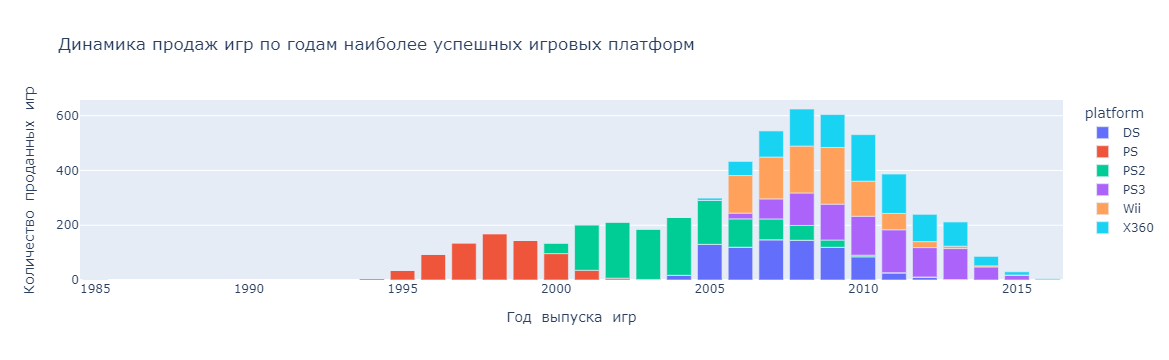

In [139]:
px.bar(platform_sales_sum_years,labels={'value':'Количество  проданных  игр',
                             'year_of_release':'Год  выпуска  игр'},
                              title='Динамика продаж игр по годам наиболее успешных игровых платформ')
      

Анализируя график, мы видим, что средний период активности игровых платформ составляет около 10 лет, причем пик продаж обычно достигается на 5-ый год.  
Проанализируем время актуальности для более широкого спектра платформ, для этого создадим таблицу  с платформами которые потеряли актуальность к 2015 году, также не будем включать в него платформы  с прадажами меньше 15.





    



In [51]:
# подготовим список платформ с продажами не менее 15(млн. проданных копиий)
sumsales=15
life_list,_ = platform_sales_table(sumsales)
print(life_list)

['DC', 'GEN', 'SAT', 'PSV', 'WiiU', '2600', 'XOne', 'GC', 'SNES', 'N64', 'NES', 'XB', 'GB', 'PC', '3DS', 'PSP', 'GBA', 'PS4', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']


In [52]:
# создадим  срез df_games-platform_life, выбрав  платформы из списка life_list, сгруппируем таблицу по столбцам 'platform'(index)
#  и  'year_of_release'(columns) , в ячейки запишем соответствующую сумму столбца 'sum_sales'
platform_life = df_games.query('platform.isin(@life_list)').\
pivot_table(index='platform',columns='year_of_release', values='sum_sales', aggfunc='sum')

# Сделаем срез  по латформам, потерявшим актуальность на 2015г.(в столбце 2015 будут пропуски)
platform_life=platform_life[platform_life[2015].isna()]

# сосчитаем ячейки с непропущенными значениями (их количество период активности платформы)
platform_life = pd.DataFrame(platform_life.count(axis=1)).rename(columns={0: 'time_life'})

# отсортируем и напечатаем platform_life
platform_life.sort_values(by='time_life')

,time_life
platform,
GEN,5
SAT,6
DC,7
GC,7
N64,7
GBA,8
XB,9
2600,10
PS,10


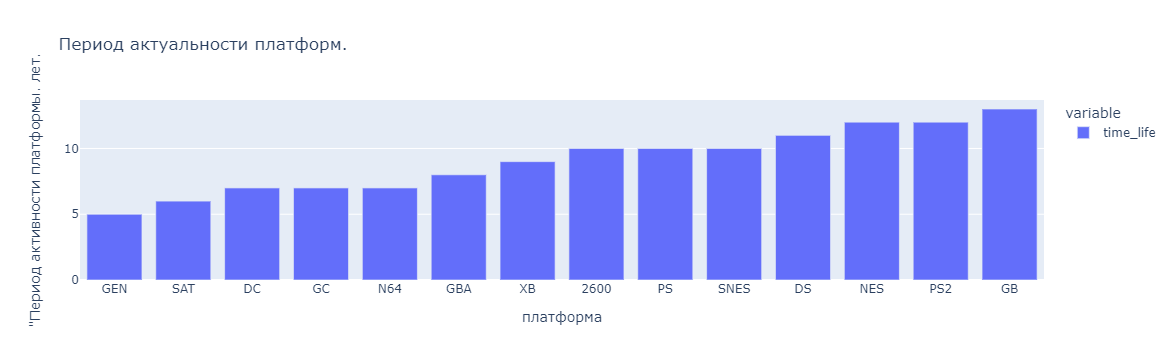

In [53]:
# напечатаем столбчатый график  по данным из platform_life
px.bar(platform_life.sort_values(by='time_life'),labels={'value':'"Период активности платформы. лет.',
                             'platform':'платформа'},
                              title='Период актуальности платформ.')      

In [54]:
platform_life.sort_values(by='time_life').describe()

,time_life
count,14.000000
mean,9.071429
std,2.464027
min,5.000000
25%,7.000000
50%,9.500000
75%,10.750000
max,13.000000


Анализ большего количества плотформ подтверждает вывод о продолжительности 'жизни' игровых платформ.
Так Медианное время сотавило 9.5 лет, максимально 13 лет, а минимальное 5лет.

Выведем итоговый график динамики продаж игр для различных платформ с суммарными продажами более 50 млн. копий, распределенный по годам.


In [55]:
sumsales=50
platform_list,  platform_sales_sum_years = platform_sales_table(sumsales,compare=True)
print(platform_list)

['PSV', 'WiiU', '2600', 'XOne', 'GC', 'SNES', 'N64', 'NES', 'XB', 'GB', 'PC', '3DS', 'PSP', 'GBA', 'PS4', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']


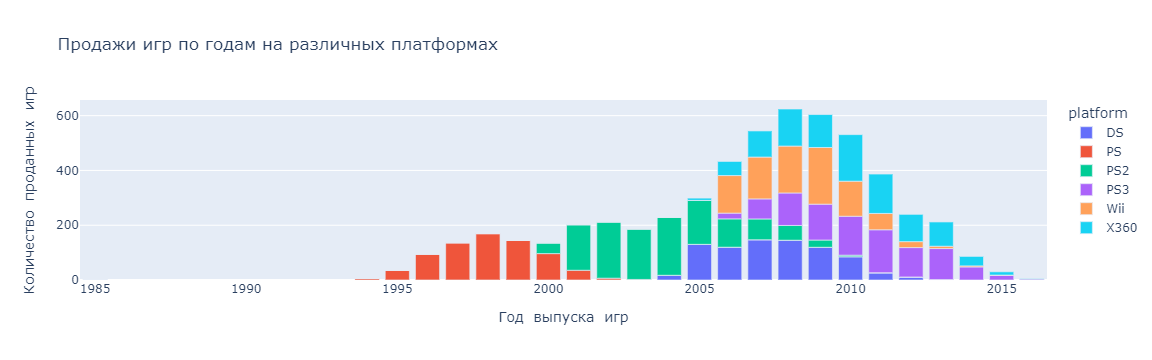

In [142]:
px.bar(platform_sales_sum_years,labels={'value':'Количество  проданных  игр',
                             'year_of_release':'Год  выпуска  игр'},
                              title='Продажи игр по годам на различных платформах')


Для определения актуальных платформ в 2015-2016 годах мы составим список list_platform_actual, включив в него те платформы, на которых были продажи в 2015 году.

In [57]:
list_platform_actual = df_games.query('year_of_release == 2015 ')['platform'].unique()
list_platform_actual

array(['PS4', 'XOne', 'WiiU', '3DS', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

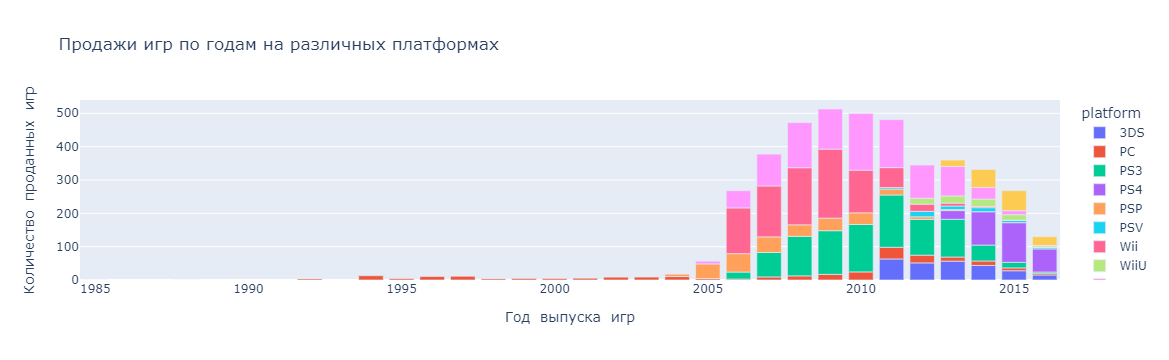

In [98]:
# отфильтруем df_games по списку платформ list_platform_actual
df_games_actual = df_games.query('platform.isin(@list_platform_actual)')
# посчитаем сумму продаж для каждой такой платформы
platform_sales_sum_years_uctual =df_games_actual\
         .pivot_table( index='year_of_release',columns='platform',values='sum_sales',aggfunc='sum')
# построим столбчатый график
px.bar(platform_sales_sum_years_uctual ,labels={'value':'Количество  проданных  игр',
                             'year_of_release':'Год  выпуска  игр'},
                              title='Продажи игр по годам на различных платформах')

Исключим из списка платформы:
1. X360 прадажи,начиная с 2010г по 2015год сократились в 10 раз, период 'активности' платформы более 10 лет.
2. Wii  около нулевые продажи в 2015г., период 'активности' 10лет.
3. PSP  около нулевые продажи в 2015г., период 'активности' 10лет.
4. PS3 продажи, начиная с 2011 к 2015году сократились более чем в 10 раз ,наличие следующего поколения платформы - PS4. Период "активности" PS3 превышает 10 лет.

Ограничим временной диапазон 2013годом.
Начиная с 2013 года представлены все платформы из актуального списка, такой временной интервал позволит учесть тенденции на рынке видеоигр.

In [59]:
list_platform_exclud = ['PSP', 'PS3',  'X360',  'Wii']
df_games_actual = df_games_actual.query('~platform.isin(@list_platform_exclud) and year_of_release >=2013')\
.reset_index(drop=True)

Проверим результат.

In [60]:
print(df_games_actual['platform'].unique(),df_games_actual['year_of_release'].unique(),df_games_actual.shape)


['PS4' '3DS' 'XOne' 'WiiU' 'PC' 'PSV'] [2015 2013 2014 2016] (1604, 12)


`df_games_actual` новый датафрейм который получили из исходного df_games, отфильтровав столбец `'year_of_release` по 
значениям [2013-2016] и столбец `platform` по значениям ['PS4' '3DS' 'XOne' 'WiiU' 'PC' 'PSV'].  

Размер 1613 строк 12 столбцов.  

Выведем датафрейм `df_games_actual` 

In [61]:
df_games_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
4,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


#### Выбор потенциально прибыльных платформ

Создадим датафрейм `sales_actual`, в котором данные будут сгруппированы по платформам и годам, а в ячейках будет указано итоговое количество проданных копий напечатаем столбчатый график.

In [62]:
sales_actual = df_games_actual.pivot_table(index='year_of_release',columns='platform',values='sum_sales',aggfunc='sum')
sales_actual

platform,3DS,PC,PS4,PSV,WiiU,XOne
year_of_release,,,,,,
2013,56.57,12.38,25.99,10.59,21.65,18.96
2014,43.76,13.28,100.00,11.90,22.03,54.07
2015,27.78,8.52,118.90,6.25,16.35,60.14
2016,15.14,5.25,69.25,4.25,4.60,26.15


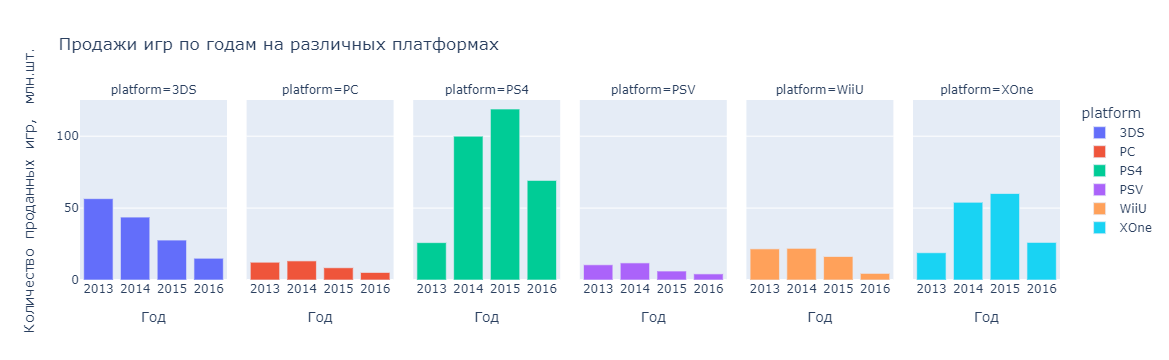

In [63]:
px.bar(sales_actual, facet_col ='platform',
                                          labels={'value':'Количество  проданных  игр,   млн.шт.',
                             'year_of_release':'Год'},
                              title='Продажи игр по годам на различных платформах')

Как было отмечено ранее  все платформы имееют тенденцию к снижению продаж в 2016 г./г. Вероятно это связано с неполными данными по продажам за 2016год. Посчитаем коэффициентом роста/падения продаж 2016г./2015г.

In [64]:
sales_actual.T.apply(lambda x: x[2016]/x[2015], axis=1).round(2).sort_values()

platform
WiiU    0.28
XOne    0.43
3DS     0.54
PS4     0.58
PC      0.62
PSV     0.68
dtype: float64

Предположительно, данные о продажах за 2016 год отражают лишь часть года, примерно полугодие.
Проанализируем продажи игр на различных платформах, исходя из данных за 2015 год.

1. PS4: Лидер продаж с годовым объемом продаж в 2015 году в 118.9 млн. копий. Наблюдается устойчивый рост продаж с 2013 года.
2. XOne: Занимает второе место с годовым объемом продаж в 2015 году в 60.14 млн. копий. Также наблюдается рост с 2013 года.
3. WiiU: Отстает от лидеров с продажами в 16.25 млн. копий. Показывает отрицательную динамику с 2013 года, что подчеркивает ее неактуальность.Кроме того, коэффициент роста/падения у WiiU самый низкий среди всех платформ.
4. PSV: Обладает наименьшим объемом продаж в 2015 году, составляющим 6.25 млн. копий. Несмотря на снижение продаж в 2015 году, коэффициент роста/падения выше, что указывает на стабильность объема продаж.
5. PS  игры персональных компьютеров, занимают свою нишу на рынке игр и остается вне рассмотрения в контексте сравнения продаж на консольных платформах.
6. 3DS Несмотря на последовательное снижение продаж  с 2013 года, в 2015 уровень продаж приставки 3DS составил 15.14 миллионов копий, что говорит о ее текущей  актуальности  на рынке.





,

**Выделим две потенциально прибыльные платформы: PS4 ; XOne .  PC ( имеет свою нишу на рынке игр)**

Построим боксплот по глобальным продажам игр с разбивкой по платформам.


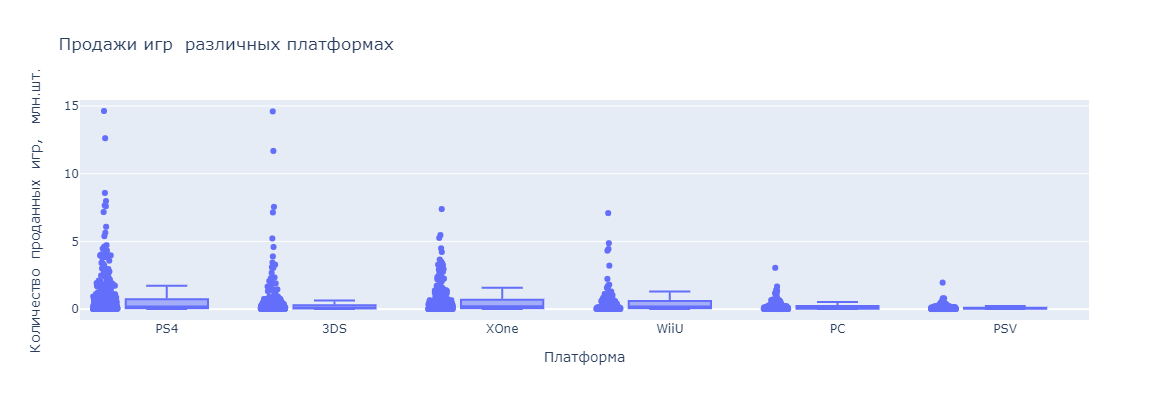

In [65]:


px.box( df_games_actual, x='platform',y='sum_sales',points='all',
                                                        labels={'sum_sales':'Количество  проданных  игр,   млн.шт.',
                                                              'platform':'Платформа'},
                              title='Продажи игр  различных платформах',
                                      width=1100, height=400)


Построим тот же график с интервалом оси oy [0,2].

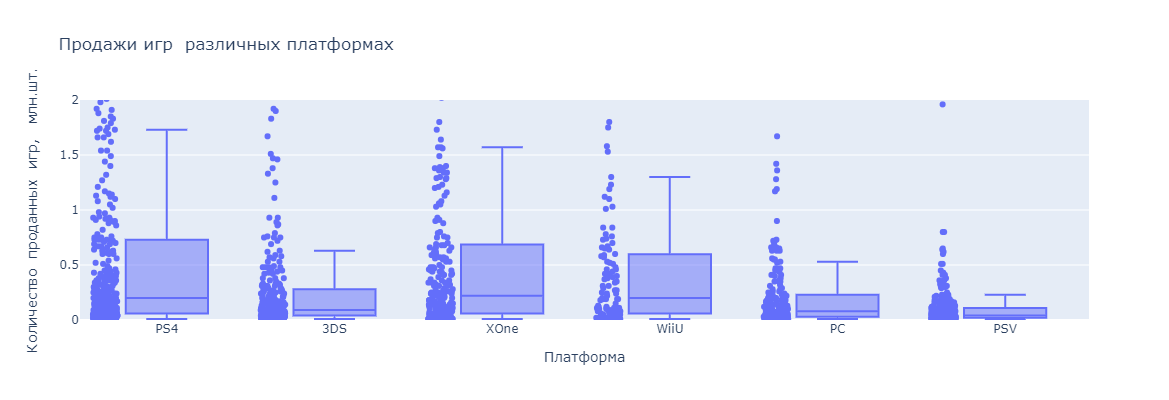

In [66]:
px.box( df_games_actual, x='platform',y='sum_sales',points='all',
                                                 labels={'sum_sales':'Количество  проданных  игр,   млн.шт.',
                                                              'platform':'Платформа'},
                              title='Продажи игр  различных платформах',
                                      width=1100, height=400,range_y=[0, 2])


Метод боксплот  используется для визуализации распределения данных и выявления выбросов в них. 
Выбросами считаются значения, которые выходят за границы "усов" боксплота,но в контексте этого исследования, выбросы вверх
могут интерпретироваться как примеры наиболее коммерчески успешных игр.

В зоне выбросов находятся два значения для платформ PS4 и 3DS, каждое из которых составляет более 12 млн. проданных
копий. Это может свидетельствовать о двух наиболее успешных играх, выпущенных для этих платформ.
 
Также отметим, что у 3 платформ (PS4, XOne, WiiU) схожие значения ящиков боксплотов. Это указывает на то , что одни и те же
игры часто выпускаются для различных платформ и они в равной мере пользуются  популярностью у пользователей.

Выделим ТОП-5 популярных платформ: **PS4, XOne, WiiU, 3DS, PC**

Проанализируем влияние отзывов на продажи на самой популярной платформе `PS4`.

Построим две диаграммы рассеяния: для отзывов пользователей и  дляоценок критиков.
Вычислим коэффициенты Пирсона:
отзывы пользователей - продажи  млн.шт. , оценки критиков _продажи млн.шт.

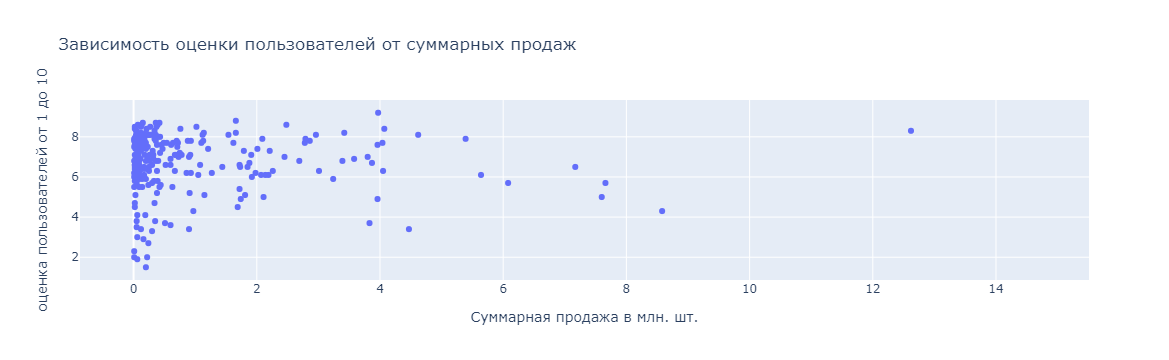

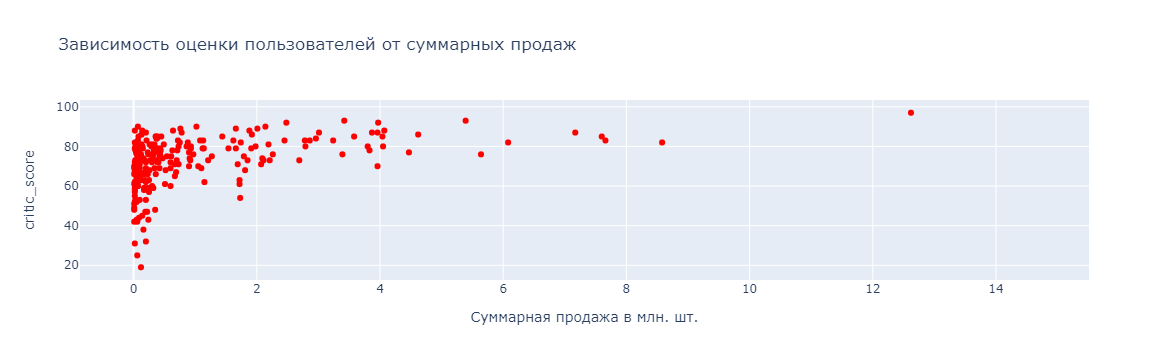

In [67]:
df_games_actual_ps4 = df_games_actual.query('platform =="PS4"')
px.scatter(df_games_actual_ps4, x='sum_sales', y='user_score',
                                                        labels={'user_score':'оценка пользователей от 1 до 10',
                                                              'sum_sales':'Суммарная продажа в млн. шт.'},
                              title='Зависимость оценки пользователей от суммарных продаж' ).show()




px.scatter(df_games_actual_ps4, x='sum_sales', y='critic_score',color_discrete_sequence=['red'],
                                                       labels={'user_score':'оценка пользователей от 1 до 10',
                                                              'sum_sales':'Суммарная продажа в млн. шт.'},
                              title='Зависимость оценки пользователей от суммарных продаж' ).show()


Вычислим коэффициент корреляции Пирсона для этих значений.

In [68]:
df_games_actual_ps4[['critic_score','user_score','sum_sales']].corr().round(2)

,critic_score,user_score,sum_sales
critic_score,1.00,0.56,0.41
user_score,0.56,1.00,-0.03
sum_sales,0.41,-0.03,1.00


Анализ диаграмм рассеяния позволяет сделать следующие выводы: 
1. Игры с продажами более 2 млн. копий, как правило, имеют отзывы критиков выше 60 баллов.Это может указывать на то, что    критики чаще рекомендуют игры с высокими продажами.
2. Отзывы юзеров не имеют четко выраженной зависимости  от величины продаж. Пользователи часто оценивают игры субъективно
  и их оценки не всегда коррелируют с коммерческим успехом игр.
3. Игры в целом получают положительные оценки от пользователей. Большинство игр оценены пользователями более чем 5.5 баллами.
5. Игры, как правило, получают высокие оценки от профессиональных критиков. Эксперты оценили большинство игр оценкой выше 50 баллов.
6. Коэффициент Пирсона для пользователей составляет -0.03, что говорит об отсутствии корреляции между продажами и оценкой пользователей.Это подтверждает вывод о том, что отзывы пользователей не имеют четкой зависимости от величины продаж.
7. Коэффициент Пирсона для экспертов составляет 0.41, что говорит о слабой положительной корреляции между продажами и оценкой экспертов.

Для сравнения построим диаграммы рассеяния и для других платформ

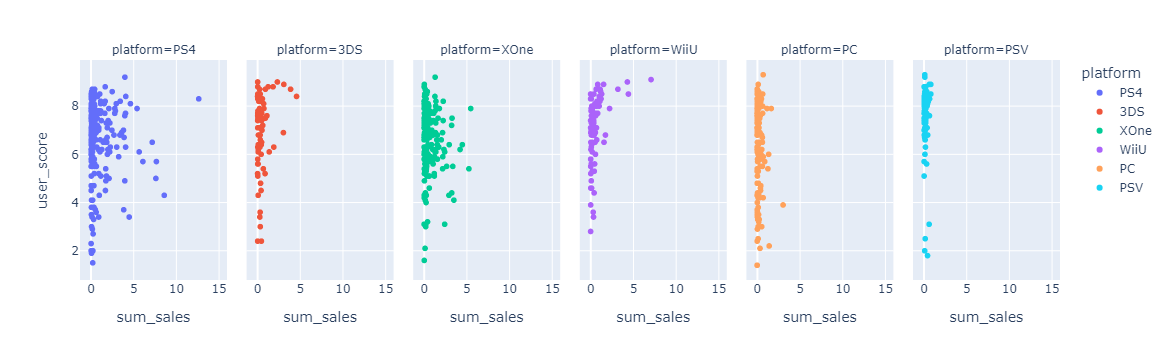

In [69]:
px.scatter(df_games_actual, x='sum_sales', y='user_score',color='platform',facet_col='platform')

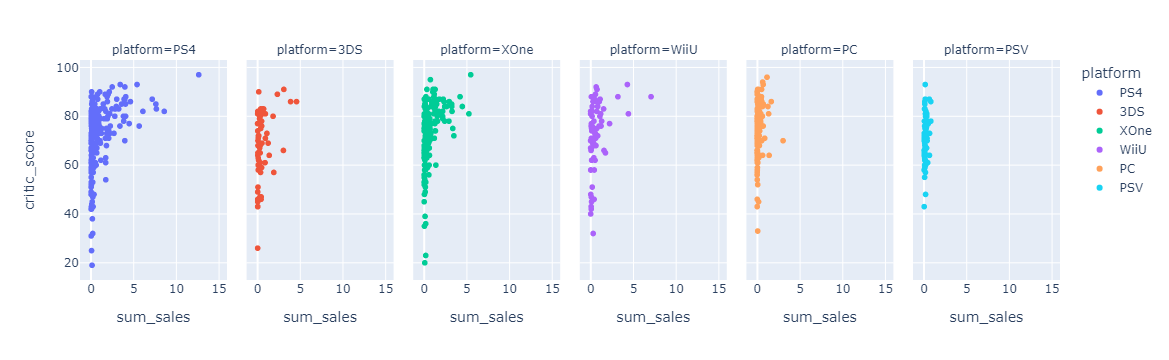

In [70]:
px.scatter(df_games_actual, x='sum_sales', y='critic_score',color='platform',facet_col='platform')



Посчитаем коэффициент корреляции Пирсона для других платформ.

1.Коэффициент корреляции Пирсона для '3DS'

In [71]:
df_games_actual.query('platform== "3DS"')[['critic_score','user_score','sum_sales']].corr().round(2)

,critic_score,user_score,sum_sales
critic_score,1.00,0.77,0.36
user_score,0.77,1.00,0.24
sum_sales,0.36,0.24,1.00


2.Коэффициент корреляции Пирсона для 'XOne'

In [72]:
df_games_actual.query('platform== "XOne"')[['critic_score','user_score','sum_sales']].corr().round(2)

,critic_score,user_score,sum_sales
critic_score,1.00,0.47,0.42
user_score,0.47,1.00,-0.07
sum_sales,0.42,-0.07,1.00


3.Коэффициент корреляции Пирсона для 'WiiU'

In [73]:
df_games_actual.query('platform== "WiiU"')[['critic_score','user_score','sum_sales']].corr().round(2)

,critic_score,user_score,sum_sales
critic_score,1.00,0.72,0.38
user_score,0.72,1.00,0.42
sum_sales,0.38,0.42,1.00


4.Коэффициент корреляции Пирсона для 'PC'

In [74]:
df_games_actual.query('platform== "PC"')[['critic_score','user_score','sum_sales']].corr().round(2)

,critic_score,user_score,sum_sales
critic_score,1.00,0.43,0.20
user_score,0.43,1.00,-0.09
sum_sales,0.20,-0.09,1.00


5.Коэффициент корреляции Пирсона для 'PSV'

In [75]:
df_games_actual.query('platform== "PSV"')[['critic_score','user_score','sum_sales']].corr().round(2)

,critic_score,user_score,sum_sales
critic_score,1.00,0.61,0.25
user_score,0.61,1.00,0.00
sum_sales,0.25,0.00,1.00


Суммарные объемы продаж игр для платформы PS4 занимают лидирующие позиции в сравнении с другими платформами.

Для  платформ 'PS4','XOne','PC','PSV'коэффициент Пирсона для пользователей составил менее 0.01, что говорит об отсутствии корреляции между продажами и оценкой пользователей для этих платформ.

Для платформ 'WiiU'и' 3DS' коэффициент пирсона для пользователей составил 0.42 и 0.24, что говорит о слабой положительной корреляции между продажами и оценками пользователей, причем для платформы 'WiiU' связь между ними наиболле значимая.

Коэффициент корреляции Пирсона для критиков показл слабую положительную корреляцию для всех платформ, с наиболее высокими значениями для 'PS4','XOne','WiiU'.


Проанализируем игры по жанрам.. Начнем с общего анализа распределения игр по жанрам, а затем перейдем к изучению объемов продаж внутри каждого жанра.


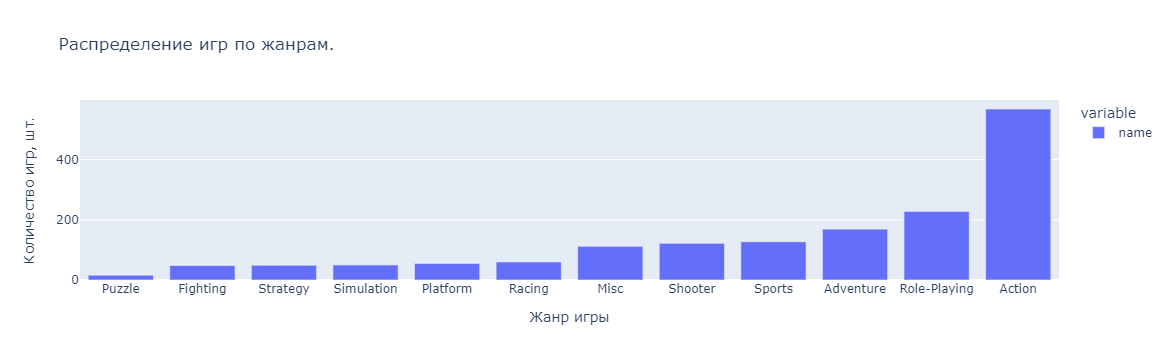

In [76]:
px.bar(df_games_actual.pivot_table(index='genre',values='name', aggfunc='count').sort_values(by='name'),
                                  labels={'genre':'Жанр игры',
                             'value':'Количество игр, шт.'},
                              title='Распределение игр по жанрам.')

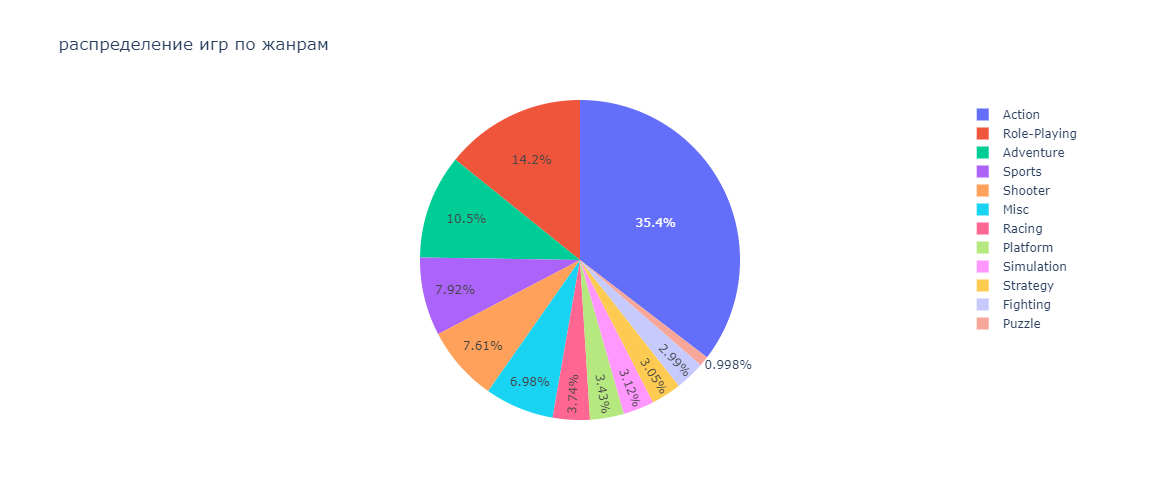

In [77]:
px.pie(df_games_actual.pivot_table(index='genre',values='name', aggfunc='count').sort_values(by='name').reset_index(), 
       title='распределение игр по жанрам', names='genre',values='name', width=600, height=500)
     

Самое большое количество игр было выпущено в жанре 'Action'. В тройку лидеров входят также 'Role-Playing' и 'Adventure'.
Наименее популярными оказались жанры 'Strategy', 'Fighting'и "Puzzle'

Проанализируем жанры по количиству проданных копий в млн. шт.

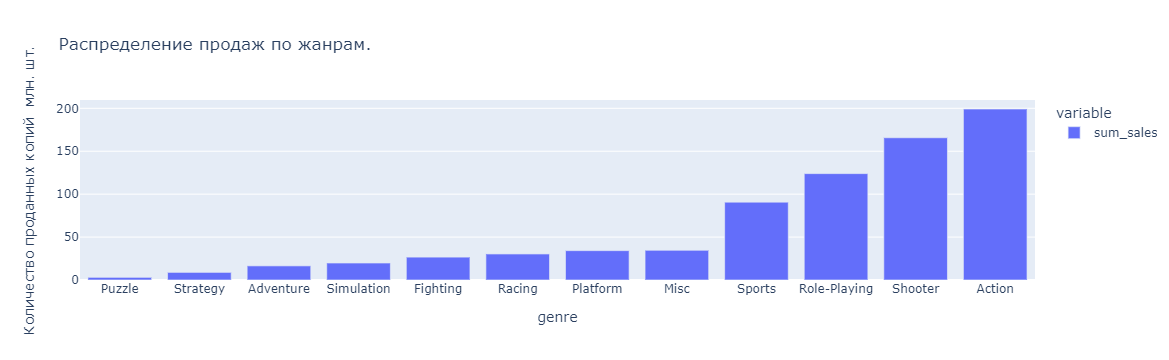

In [78]:
px.bar(df_games_actual.pivot_table(index='genre',values='sum_sales',aggfunc='sum').sort_values(by='sum_sales'),
                                  labels={'ganre':'Жанр игры',
                             'value':'Количество проданных копий  млн. шт.'},
                              title='Распределение продаж по жанрам.')

1. Самыми популярными жанрами является 'Action' с долей  35.3% , 'Roul-plaing' c долей 14.3% и'Adventure' с долей 10.5%
от всех игр.
2. 'Sport','Shooter','Music' среднепредставленные игры с долями около 7% каждая.
3. Наименее представленными жанрами являются 'Puzzle','Strategy','Adventure' менее 3% каждая.

1. Лидером продаж являются игры в жанре **'Action'-около 200млн** проданных копий.
2. Игры в жанрах 'Sport','Role-Playing ','Shooter' имеют заметно более высокие продажи чем остальные. более 90 млн. копий.
3. Аутсайдерами являются игры в двух жанрах 'Puzzle','Starategy'  спродажами менее 9 млн. копий.




**В результате исследования пришли к следующим выводам**:
1. Ссредний период активности игровых платформ составляет около 10 лет, причем пик продаж обычно достигается на 5-ый год.
2. Самы прибыльные прибыльные платформы: PS4 ; XOne . PC ( имеет свою нишу на рынке игр),суммарные объемы продаж игр для платформы PS4 занимают лидирующие позиции.
3. Самое большое количество игр было выпущено в жанре 'Action'. В тройку лидеров входят также 'Role-Playing' и 'Adventure'. Наименее популярными оказались жанры 'Strategy', 'Fighting'и "Puzzle'. Лидером продаж являются игры в жанре 'Action'-около 200млн проданных копий.
4. Для дальнейшего анализа мы выбираем актуальный период с 2013 по 2016 годы. Актуальные платформы для этого периода включают в себя 'PS4', '3DS', 'XOne', 'WiiU', 'PC' и 'PSV'.
5. Игры с продажами более 2 млн. копий, как правило, имеют отзывы критиков выше 60 баллов. Это может указывать на то, что критики чаще рекомендуют игры с высокими продажами.
6.  Отзывы юзеров не имеют четко выраженной тенденции от величины продаж. Пользователи часто оценивают игры субъективно и их оценки не всегда коррелируют с коммерческим успехом игр.
7. Игры в целом получают положительные оценки от пользователей. Большинство игр оценены пользователями более чем 5.5 баллами.
8. Игры, как правило, получают высокие оценки от профессиональных критиков. Эксперты оценили большинство игр оценкой выше 50 баллов.
9. Коэффициент Пирсона для пользователей составляет -0.03, что говорит об отсутствии корреляции между продажами и оценкой пользователей.Это подтверждает вывод о том, что отзывы пользователей не имеют четкой зависимости от величины продаж.
10. Коэффициент Пирсона для экспертов составляет 0.41, что говорит о слабой положительной корреляции между продажами и оценкой экспертов.
 
Далее для анализа будем использовать датафрейм `df_games_actual`, с актуальным периодом 2013-2016 год и
 и актуальными платформами:'PS4' '3DS' 'XOne' 'WiiU' 'PC' 'PSV'. 


### Определение пользовательского профиля 

Определим самые популярные платформы (ТОП-5) для каждого региона. Оценивать будем в долях продаж.


In [79]:
users_sales = df_games_actual.pivot_table( index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
# users_sales['sum_sales'] = users_sales.sum(axis=1)
# users_sales_norm =users_sales.div(users_sales['sum_sales'],axis=0).drop('sum_sales',axis=1)

In [80]:
display(users_sales)

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
PC,25.36,0.00,11.11
PS4,141.09,15.96,108.74
PSV,6.10,18.59,5.04
WiiU,19.85,10.88,29.21
XOne,51.59,0.34,93.12


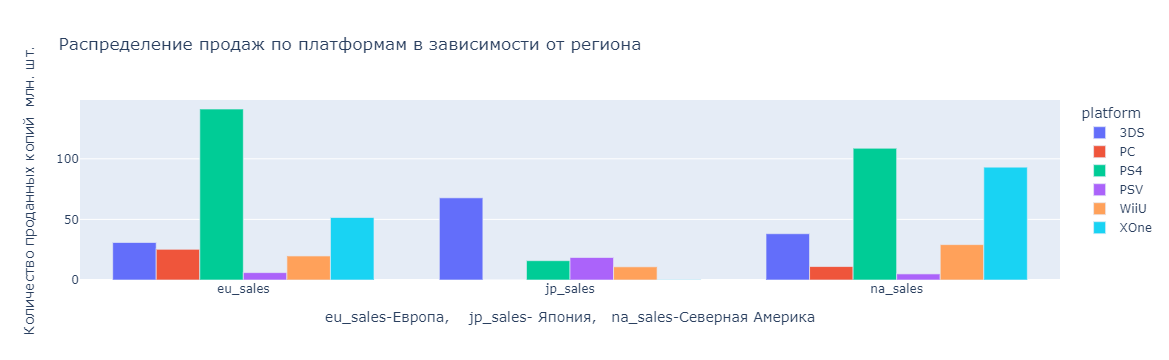

In [81]:
px.bar(users_sales.T, barmode='group', labels={'index':'eu_sales-Европа,    jp_sales- Япония,   na_sales-Северная Америка',
                             'value':'Количество проданных копий  млн. шт.'},
                              title=('Распределение продаж по платформам в зависимости от региона'))

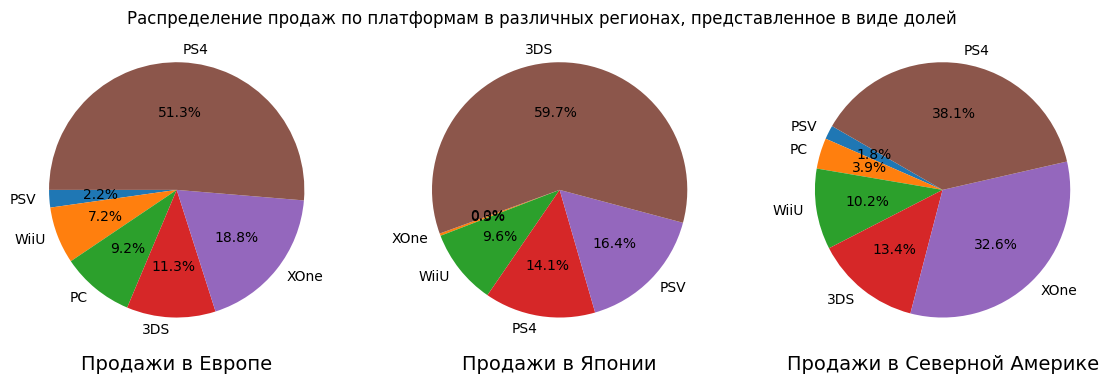

In [82]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 8))
fig.suptitle('Распределение продаж по платформам в различных регионах, представленное в виде долей' )
fig.subplots_adjust(top=1.4)
users_sales.reset_index().sort_values(by='eu_sales')\
       .plot(kind='pie' ,labels=users_sales.reset_index().sort_values(by='eu_sales')['platform'],
                              y='eu_sales', legend=False, ax=axes[0], autopct='%1.1f%%',startangle=180  )

users_sales.reset_index().sort_values(by='jp_sales')\
    .plot(kind='pie', labels=users_sales.reset_index().sort_values(by='jp_sales')['platform'],startangle=200,
                              y='jp_sales', legend=False, ax=axes[1], autopct='%1.1f%%')

users_sales.reset_index().sort_values(by='na_sales')\
    .plot(kind='pie', labels=users_sales.reset_index().sort_values(by='na_sales')['platform'],startangle= 150,
                              y='na_sales', legend=False, ax=axes[2], autopct='%1.1f%%')

axes[0].set_xlabel('Продажи в Европе',fontsize=14)
axes[1].set_xlabel('Продажи в Японии',fontsize=14)
axes[2].set_xlabel('Продажи в Северной Америке',fontsize=14)

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

plt.show()


Самые популярные платформы в Европе:
1.PS4 с долей 51.3%, XOne c долей 18.7%,  3DS с долей 11.3%
2. ТОП-5 : PS4, XOne, 3DS, PC, WiiU.

Самые популярные платформы в Японии:
1.3DS с долей 59.7%, PSV c долей 16.4%, PS4 с долей 14%
2. ТОП-5 : 3DS, PSV, PS4, WiiU, XOne.

Самые популярные платформы в Северной Америке:
1.PS4 с долей 38%, XOne c долей 32.5%,  3DS сдолей 13.6%
2. ТОП-5 : PS4, XOne, 3DS, WiiU, PC.

Можно сделать вывод о том, что предпочтения пользователей в Европе и Северной Америке схожие, ТОП-5 платформ одинаков, также одинаковы 
три самые популярные платформы. PS4, XOne, 3DS. В европе болле половины всех пользователей предпочитают платформу PS4, в Северной Америке
таких пользователей 38%. В Японии лидирует платформа 3DS, ее предпочитает  почти 60% пользователей, консоль XOne в Японии  в отличии  от других регионов практически не представлена.

#### Самые популярные жанры

Сгруппируем `df_games_actual` по столбцу `genre` и посчитаем продажи для каждого региона. Выведем полученную таблицу для ознокомления.

In [83]:
users_genre = df_games_actual.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
users_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,73.96,29.87,73.43
Adventure,5.88,4.37,4.57
Fighting,6.58,5.33,12.10
Misc,10.61,8.27,12.69
Platform,12.16,4.75,14.18
Puzzle,1.00,1.14,0.83
Racing,15.18,1.68,10.29
Role-Playing,32.00,44.84,37.92
Shooter,64.89,4.56,75.37


Построим столбчатые графики распределения продаж по платформам для каждого региона.

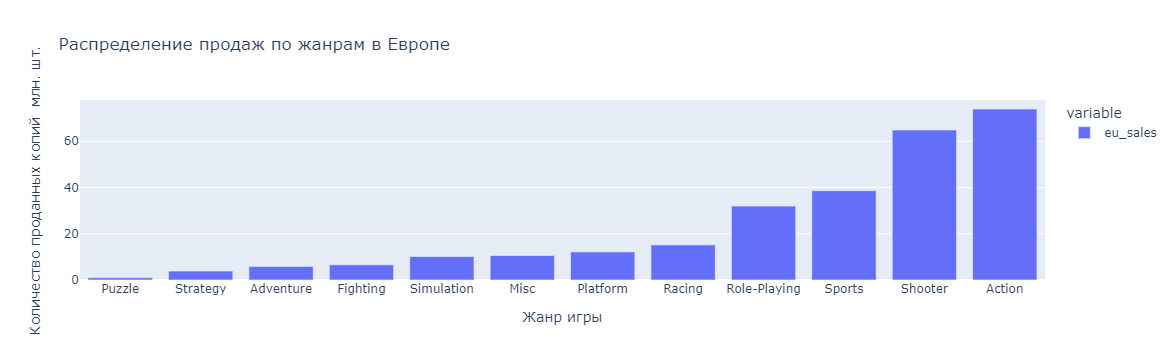

In [84]:
px.bar(users_genre['eu_sales'].sort_values(),
                                labels={'genre':'Жанр игры',
                             'value':'Количество проданных копий  млн. шт.'},
                              title=('Распределение продаж по жанрам в Европе'))          


Выделим ТОП-5 жанров в Европе: 'Racing','Role-Playng','Sports','Shooter','Action'.  
**Самый популярный жанр 'Action'**

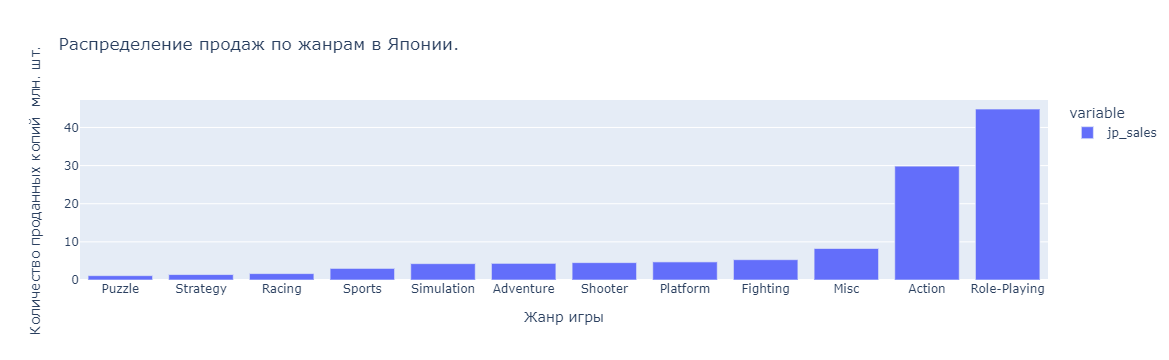

In [85]:
px.bar(users_genre['jp_sales'].sort_values(),
                                     labels={'genre':'Жанр игры',
                             'value':'Количество проданных копий  млн. шт.'},
                              title=('Распределение продаж по жанрам в Японии.'))   

Выделим ТОП-5 жанров в Японии 'Platform','Fighting','Music','Action','Role-Playing'.  
**Самый популярный жанр 'Role-Playing'**

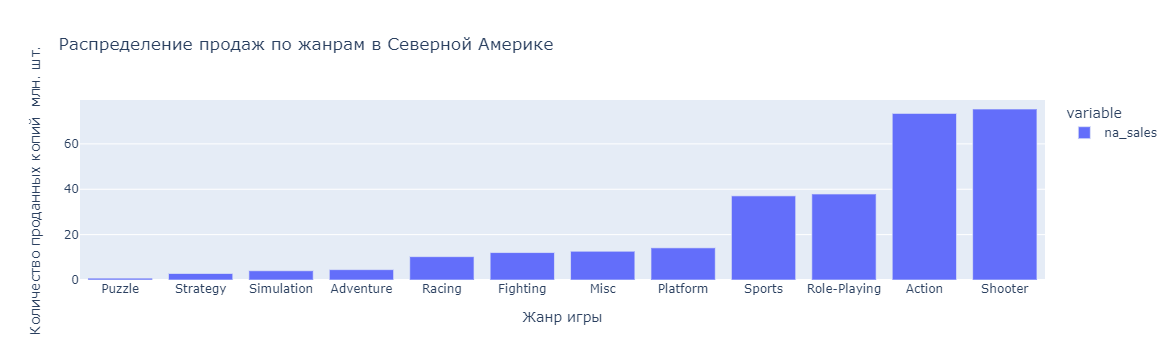

In [86]:
px.bar(users_genre['na_sales'].sort_values(),labels={'genre':'Жанр игры',
                             'value':'Количество проданных копий  млн. шт.'},
                              title=('Распределение продаж по жанрам в Северной Америке'))   

Выделим ТОП-5 жанров в Северной Америке 'Platform','Sports','Role-Playing','Action','Shooter'.
**Самый популярный жанр 'Shooter'**

Подведем итоги.

ТОП-5 жанров  в порядке возрастания популярности:
1. Европа:         'Racing','Role-Playng','Sports','Shooter','Action'
2. Северная Америка: 'Platform','Sports','Role-Playing','Action','Shooter'.
3. Япония: 'Platform','Fighting','Music','Action','Role-Playing'.
   
Предпочтения пользователей в Европе и Северной Америке схожи, ТОП-5 жанров в обоих регионах оказался почти одинаковым. Однако список предпочтений японских пользователей заметно отличается. Это  можно объяснить различиями культурными особенностями каждого региона.
В Европе и Северной Америке предпочтения могут быть более схожими из-за общих культурных влияний, в Японии  традиции и своебразный уклад жизни могут сказываться на предпочтениях пользователей.

Различия распространенности игровых платформ также могут оказать влияние на предпочтения игроков в разных регионах. Анализ показал, что пользователи из Европы и Северной Америки,по сравнению с пользователями из Японии, имеют различные предпочтения в выборе игровых платформ.
Также стоит отметить,что жанры 'Action' и 'Role_Playng'  популярны у пользователей из всех регионов.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>

Супер

##### Влияние рейтинга ESRB на продажи в отдельном регионе

In [87]:
rating_esrb

,rating,value
0,E,Everyone
1,M,Mature
2,T,Teen
3,E10+,Everyone 10 and older
4,K-A,Kids to Adults
5,AO,Adults Only
6,EC,Early Childhood
7,RP,Rating Pending


В таблице выше расшифровка значений рейтинга ESRB.  
Вывeдем уникальные значени я рейтинга в датафрейме `df_games_actual`

In [88]:
df_games_actual['rating'].unique()

array(['RP', 'M', 'E', 'T', 'E10+'], dtype=object)

Значение RP Reting Pendon категория, которая присваивается видеоиграм, ещё не получившим рейтинг. 
Сгруппируем `df_games_actual` по столбцу `rating` и посчитаем суммарные продажи в каждой  категориb
( NA, EU, JP), результат запишем в `user_esrb`.

In [89]:
users_esrb=df_games_actual.pivot_table(index='rating',
                                       values= ['na_sales','eu_sales','jp_sales'],aggfunc='sum')


In [90]:
users_esrb

,eu_sales,jp_sales,na_sales
rating,,,
E,58.00,13.26,52.37
E10+,26.30,5.66,32.25
M,94.51,8.17,97.05
RP,63.54,72.97,68.68
T,32.60,13.52,35.07


Построим столбчатый график, демонстрирующий продажи игр в различных регионах в зависимости от рейтинга ESRB.

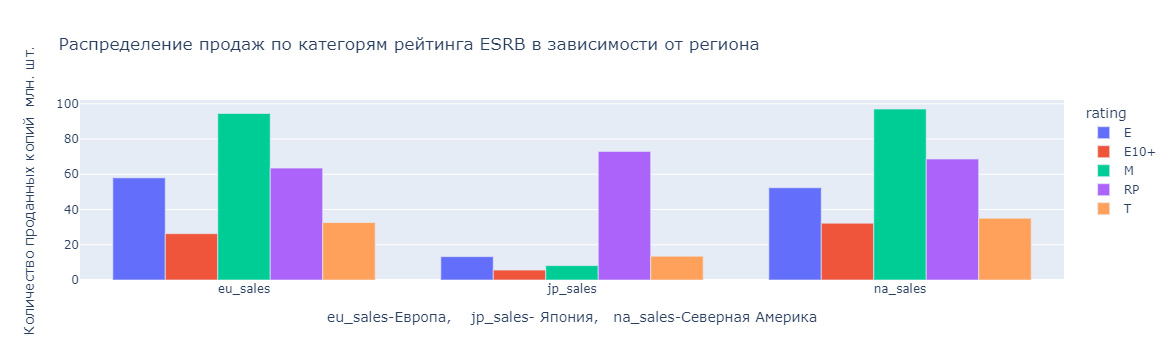

In [91]:
px.bar(users_esrb.T,barmode='group',
                                      labels={'index':'eu_sales-Европа,    jp_sales- Япония,   na_sales-Северная Америка',
                             'value':'Количество проданных копий  млн. шт.'},
                              title=('Распределение продаж по категорям рейтинга ESRB в зависимости от региона'))

Тоже распределение визуализируем в виде долей.

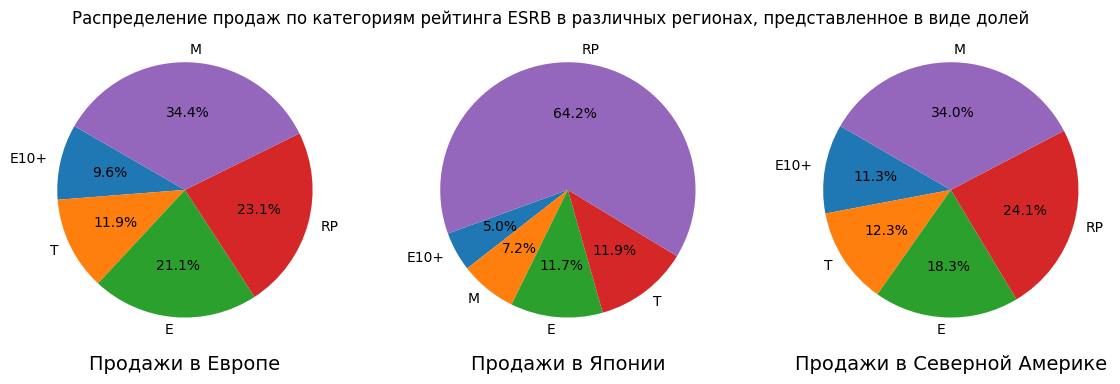

In [92]:


fig, axes = plt.subplots(ncols=3, figsize=(14, 8))
fig.suptitle('Распределение продаж по категориям рейтинга ESRB в различных регионах, представленное в виде долей' )
fig.subplots_adjust(top=1.4)
users_esrb.reset_index().sort_values(by='eu_sales')\
       .plot(kind='pie' ,startangle=150,labels=users_esrb.reset_index().sort_values(by='eu_sales')['rating'],
                              y='eu_sales', legend=False, ax=axes[0], autopct='%1.1f%%',
            
             )

users_esrb.reset_index().sort_values(by='jp_sales')\
    .plot(kind='pie', labels=users_esrb.reset_index().sort_values(by='jp_sales')['rating'],startangle=200,
                              y='jp_sales', legend=False, ax=axes[1], autopct='%1.1f%%')

users_esrb.reset_index().sort_values(by='na_sales')\
    .plot(kind='pie', labels=users_esrb.reset_index().sort_values(by='na_sales')['rating'],startangle= 150,
                              y='na_sales', legend=False, ax=axes[2], autopct='%1.1f%%')

axes[0].set_xlabel('Продажи в Европе',fontsize=14)
axes[1].set_xlabel('Продажи в Японии',fontsize=14)
axes[2].set_xlabel('Продажи в Северной Америке',fontsize=14)

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

plt.show()


В Европе и Северной Америке около трети продаж приходится на игры с рейтингом "M" (Mature), а на игры без рейтинга приходится около четверти продаж. В Японии почти две трети продаж приходится на игры с неустановленным рейтингом.
Влияние рейтинга ESRB на продажи в рамках  данного исследования неочевидно.

Основные выводы:
1. Самые популярные платформы в Европе: 1.PS4 с долей 51.3%, XOne c долей 18.7%, 3DS с долей 11.3% 2. ТОП-5 : PS4, XOne, 3DS, PC, WiiU.
2. Самые популярные платформы в Японии: 1.3DS с долей 59.7%, PSV c долей 16.4%, PS4 с долей 14% 2. ТОП-5 :   3DS, PSV, PS4, WiiU, XOne.
3. Самые популярные платформы в Северной Америке: 1.PS4 с долей 38%, XOne c долей 32.5%, 3DS сдолей 13.6% 2. ТОП-5 : PS4, XOne, 3DS, WiiU, PC.


ТОП-5 жанров в порядке возрастания популярности:
1. Европа: 'Racing','Role-Playng','Sports','Shooter','Action'
2. Северная Америка: 'Platform','Sports','Role-Playing','Action','Shooter'.
3.  Япония: 'Platform','Fighting','Music','Action','Role-Playing'.

Предпочтения пользователей в Европе и Северной Америке схожи как по платформам, так и по жанрам. PS4 и Xbox One являются самыми популярными платформами в обоих регионах. Также наиболее популярные жанры в этих регионах, такие как 'Action' и 'Shooter', говорят о схожести пользовательского профиля и предпочтений в играх.

В отличие от этого, в Японии самой популярной платформой стала 3DS, а наиболее популярным жанром стал 'Role-Playing'. Жанр 'Action' наиболее популярный в Европе и Северной Америке, Японии предпочитают в меньшей степени. Эти различия указывают на различные предпочтения  японских пользователей  и пользователей Eвропы и Северной Америки.

### Проверка гипотез

#### Проверка утверждения: рейтинги пользовательских платформ  Xbox One и PC одинаковые.



Сформулируем нулевую гипотезу H0: Средние значения рейтингов платформ Xbox One и платформы PC равны.

Альтернативная гипотеза H1: Средние значения рейтингов платформы Xbox One и PC различаются.

Cформируем выборки из датафрейма `df_games_actual`:
1. `user_score_xone` значения пользовательских рейтингов для Xbox One.
2. `user_score_pc`   значения пользовательских рейтингов для PC.

Зададим уровень значимости  на уровне 5% (конвенциальное значение).

In [93]:
# отфильтруем df_games_actual по значению XOne в столбце platform, удалим пропуски, сбросим индекс.
user_score_xone = df_games_actual.query('platform == "XOne"')[['user_score']].dropna().reset_index(drop=True)

# отфильтруем df_games_actual по значению PC в столбце platform, удалим пропуски, сбросим индекс.
user_score_pc = df_games_actual.query('platform == "PC"')[['user_score']].dropna().reset_index(drop=True)

print(user_score_xone.info() , user_score_pc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_score  182 non-null    float64
dtypes: float64(1)
memory usage: 1.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_score  155 non-null    float64
dtypes: float64(1)
memory usage: 1.3 KB
None None


In [94]:
alpha= 0.05
results = st.ttest_ind(user_score_xone,user_score_pc )
print(f'значение p-value : {results.pvalue}')
if results.pvalue < alpha:
    print(f'На уровне значимости {alpha}, отвергается нулевая гипотеза H0')
else:
    print(f'Нулевая гипотеза H0:не отвергается на уровне значимости {alpha}') 
    

значение p-value : [0.14012658]
Нулевая гипотеза H0:не отвергается на уровне значимости 0.05


Результат статистического теста показал, что на уровне значимости 0.05 нулевая гипотеза H0 о равенстве средних пользовательских рейтингов для платформ Xbox One и PC не отвергается. Недостаточно статистических доказательств, чтобы считать, что средние рейтинги пользователей для этих двух платформ различаются.

**Не удалось обнаружить значимых различий между средними пользовательскими рейтингами для платформ Xbox One и PC на уровне значимости 0.05.**


#### Проверка утверждения: средние пользовательские рейтинги жанров  Action и Sports разные.

Сформулируем нулевую гипотезу H0: Средние значения рейтингов для жанров Action и Sports равны.

Альтернативная гипотеза H1: Средние значения рейтингов платформы Xbox One и PC различаются.

Cформируем выборки из датафрейма `df_games_actual`:
1. `user_score_action` значения пользовательских рейтингов для Xbox One.
2. `user_score_sports`   значения пользовательских рейтингов для PC.

Зададим уровень значимости  на уровне 5% (конвенциальное значение).

In [95]:
# отфильтруем df_games_actual по значению XOne в столбце platform, удалим пропуски, сбросим индекс.
user_score_action = df_games_actual.query('genre == "Action"')[['user_score']].dropna().reset_index(drop=True)

# отфильтруем df_games_actual по значению PC в столбце platform, удалим пропуски, сбросим индекс.
user_score_sports = df_games_actual.query('genre == "Sports"')[['user_score']].dropna().reset_index(drop=True)

print(user_score_action.info(),user_score_sports.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_score  285 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_score  101 non-null    float64
dtypes: float64(1)
memory usage: 936.0 bytes
None None


In [97]:
alpha= 0.05
results = st.ttest_ind(user_score_action,user_score_sports )
print(f'значение p-value : {results.pvalue}')
if results.pvalue < alpha:
    print(f'На уровне значимости {alpha}, отвергается нулевая гипотеза H0')
else:
    print(f'Нулевая гипотеза H0:не отвергается на уровне значимости {alpha}') 
    

значение p-value : [6.52822629e-15]
На уровне значимости 0.05, отвергается нулевая гипотеза H0


Результат статистического теста показал, что на уровне значимости 0.05 нулевая гипотеза H0 о равенстве средних пользовательских рейтингов для жанров Action и Sports н отвергается в пользу гипотезы H1. Cтатистических доказано, ччто средние рейтинги пользователей для этих двух жанров различаются.



**Существует статистически значимое различие между средними значениями пользовательских рейтингов для жанров Action и Sports.**







Нулевая гипотеза H0 формируется на основании предположения. что средние значения выборок, или выборок и генеральной совокупности не различаются.
Альтернативная гипотеза H1 вытекает из H0 и утверждает неравенство средних значений.  Можно рассматривать различные варианты сравнения: среднее выборки больше ( правосторонняя гипотеза) или меньше (левосторонняя гипотеза) среднего другой выборки или
генеральной совокупности.
st.ttest_ind использует t-критерий Стьюдента для проверки статистической значимости различий между средними значениями двух независимых выборок.
Парметры:
1. array1, array2 -массивы данных, содержащиеся в выбоках.
2. alternative  -параметр, задающий альтернативную гипотезу(двусторонняя, левосторонняя, правосторонняя)


Выводы:
1. Не удалось обнаружить значимых различий между средними пользовательскими рейтингами для платформ Xbox One и PC на уровне значимости 0.05.
2. Cуществует статистически значимое различие между средними значениями пользовательских рейтингов для жанров Action и Sports.

### Вывод:

В результате предобработки данных получили итоговый датфрейм 'df_games'. Для этого в исходной таблице произвели следующие изменения:
1. Заполнили пропуски в столбцахraiting,year_of_release.
2. Обработали пропуски в столбце name.
3. Оптимизировали котегоризацию столбцаrating.
4. Привели типы данных: к целочисленному в столбце year_of_release, к числовому в столбце user_score
5. Проверили данные на наличие дубликатов
6. Создали столбец sum_sales с сумарными продажами во всех регионах.

Пришли к следующим выводам:
1. Средний период активности игровых платформ составляет около 10 лет, причем пик продаж обычно достигается на 5-ый год.
2. Самые прибыльные прибыльные платформы: PS4 ; XOne . PC ( имеет свою нишу на рынке игр),суммарные объемы продаж игр для платформы PS4 занимают лидирующие позиции.
3. Лидер по количеству игр жанр 'Action'. В тройку лидеров входят также 'Role-Playing' и 'Adventure'. Наименее популярными оказались жанры 'Strategy', 'Fighting'и "Puzzle'. Лидером продаж являются игры в жанре 'Action'-около 200млн проданных копий.

4. Игры с продажами более 2 млн. копий, как правило, имеют отзывы критиков выше 60 баллов. Это может указывать на то, что критики чаще рекомендуют игры с высокими продажами.
5. Отзывы юзеров не имеют четко выраженной тенденции от величины продаж. Большинство игр оценены пользователями более чем 5.5 баллами.
6. Эксперты оценили большинство игр оценкой выше 50 баллов.
7. Список наиболее актуальных платформ :'PS4' '3DS' 'XOne' 'WiiU' 'PC' 'PSV'.

Особенности профиля пользователя в каждом регионе:

Предпочтения пользователей в Европе и Северной Америке схожи как по платформам, так и по жанрам. PS4 и Xbox One являются самыми популярными. Также наиболее популярные жанры в этих регионах, такие как 'Action' и 'Shooter', говорят о схожести пользовательского профиля и предпочтений в играх.

В отличие от этого, в Японии самой популярной платформой стала 3DS, а наиболее популярным жанром стал 'Role-Playing'. Жанр 'Action' наиболее популярный в Европе и Северной Америке, Японии предпочитают в меньшей степени. Эти различия указывают на различные предпочтения японских пользователей и пользователей Eвропы и Северной Америки.


В результате статистического анализа не было выявлено значимых различий между средними пользовательскими рейтингами для платформ Xbox One и PC.
Однако было обнаружено статистически значимое различие между средними значениями пользовательских рейтингов для жанров Action и Sports.
Рекомендации:
1. Фокус на лидирующих платформах: Сосредоточьте внимание на PS4 и Xbox One, так как они приносят наибольшую прибыль.
2. Имейте в виду различия в предпочтениях пользователей в разных регионах, особенно в отношении платформы 3DS в Японии.
3. Сделать акцент на ТОП популярных жанрах, с учетом региональных особенностей.
4. Предлагать игры с высокими оценками экспертов, так как они часто привлекают больше покупателей.
5. Учитывайте время активности игровых платформ. Имейте в виду, что средний период активности платформ составляет около 5 лет.
